In [2]:
%%capture
!curl -OL https://raw.githubusercontent.com/pwwang/plotnine-prism/refs/heads/master/examples/nb_helpers.py
import patchworklib as pw
from plotnine import *
from plotnine_prism import *
from datar.base import seq, rep

%run nb_helpers.py

# Minor ticks

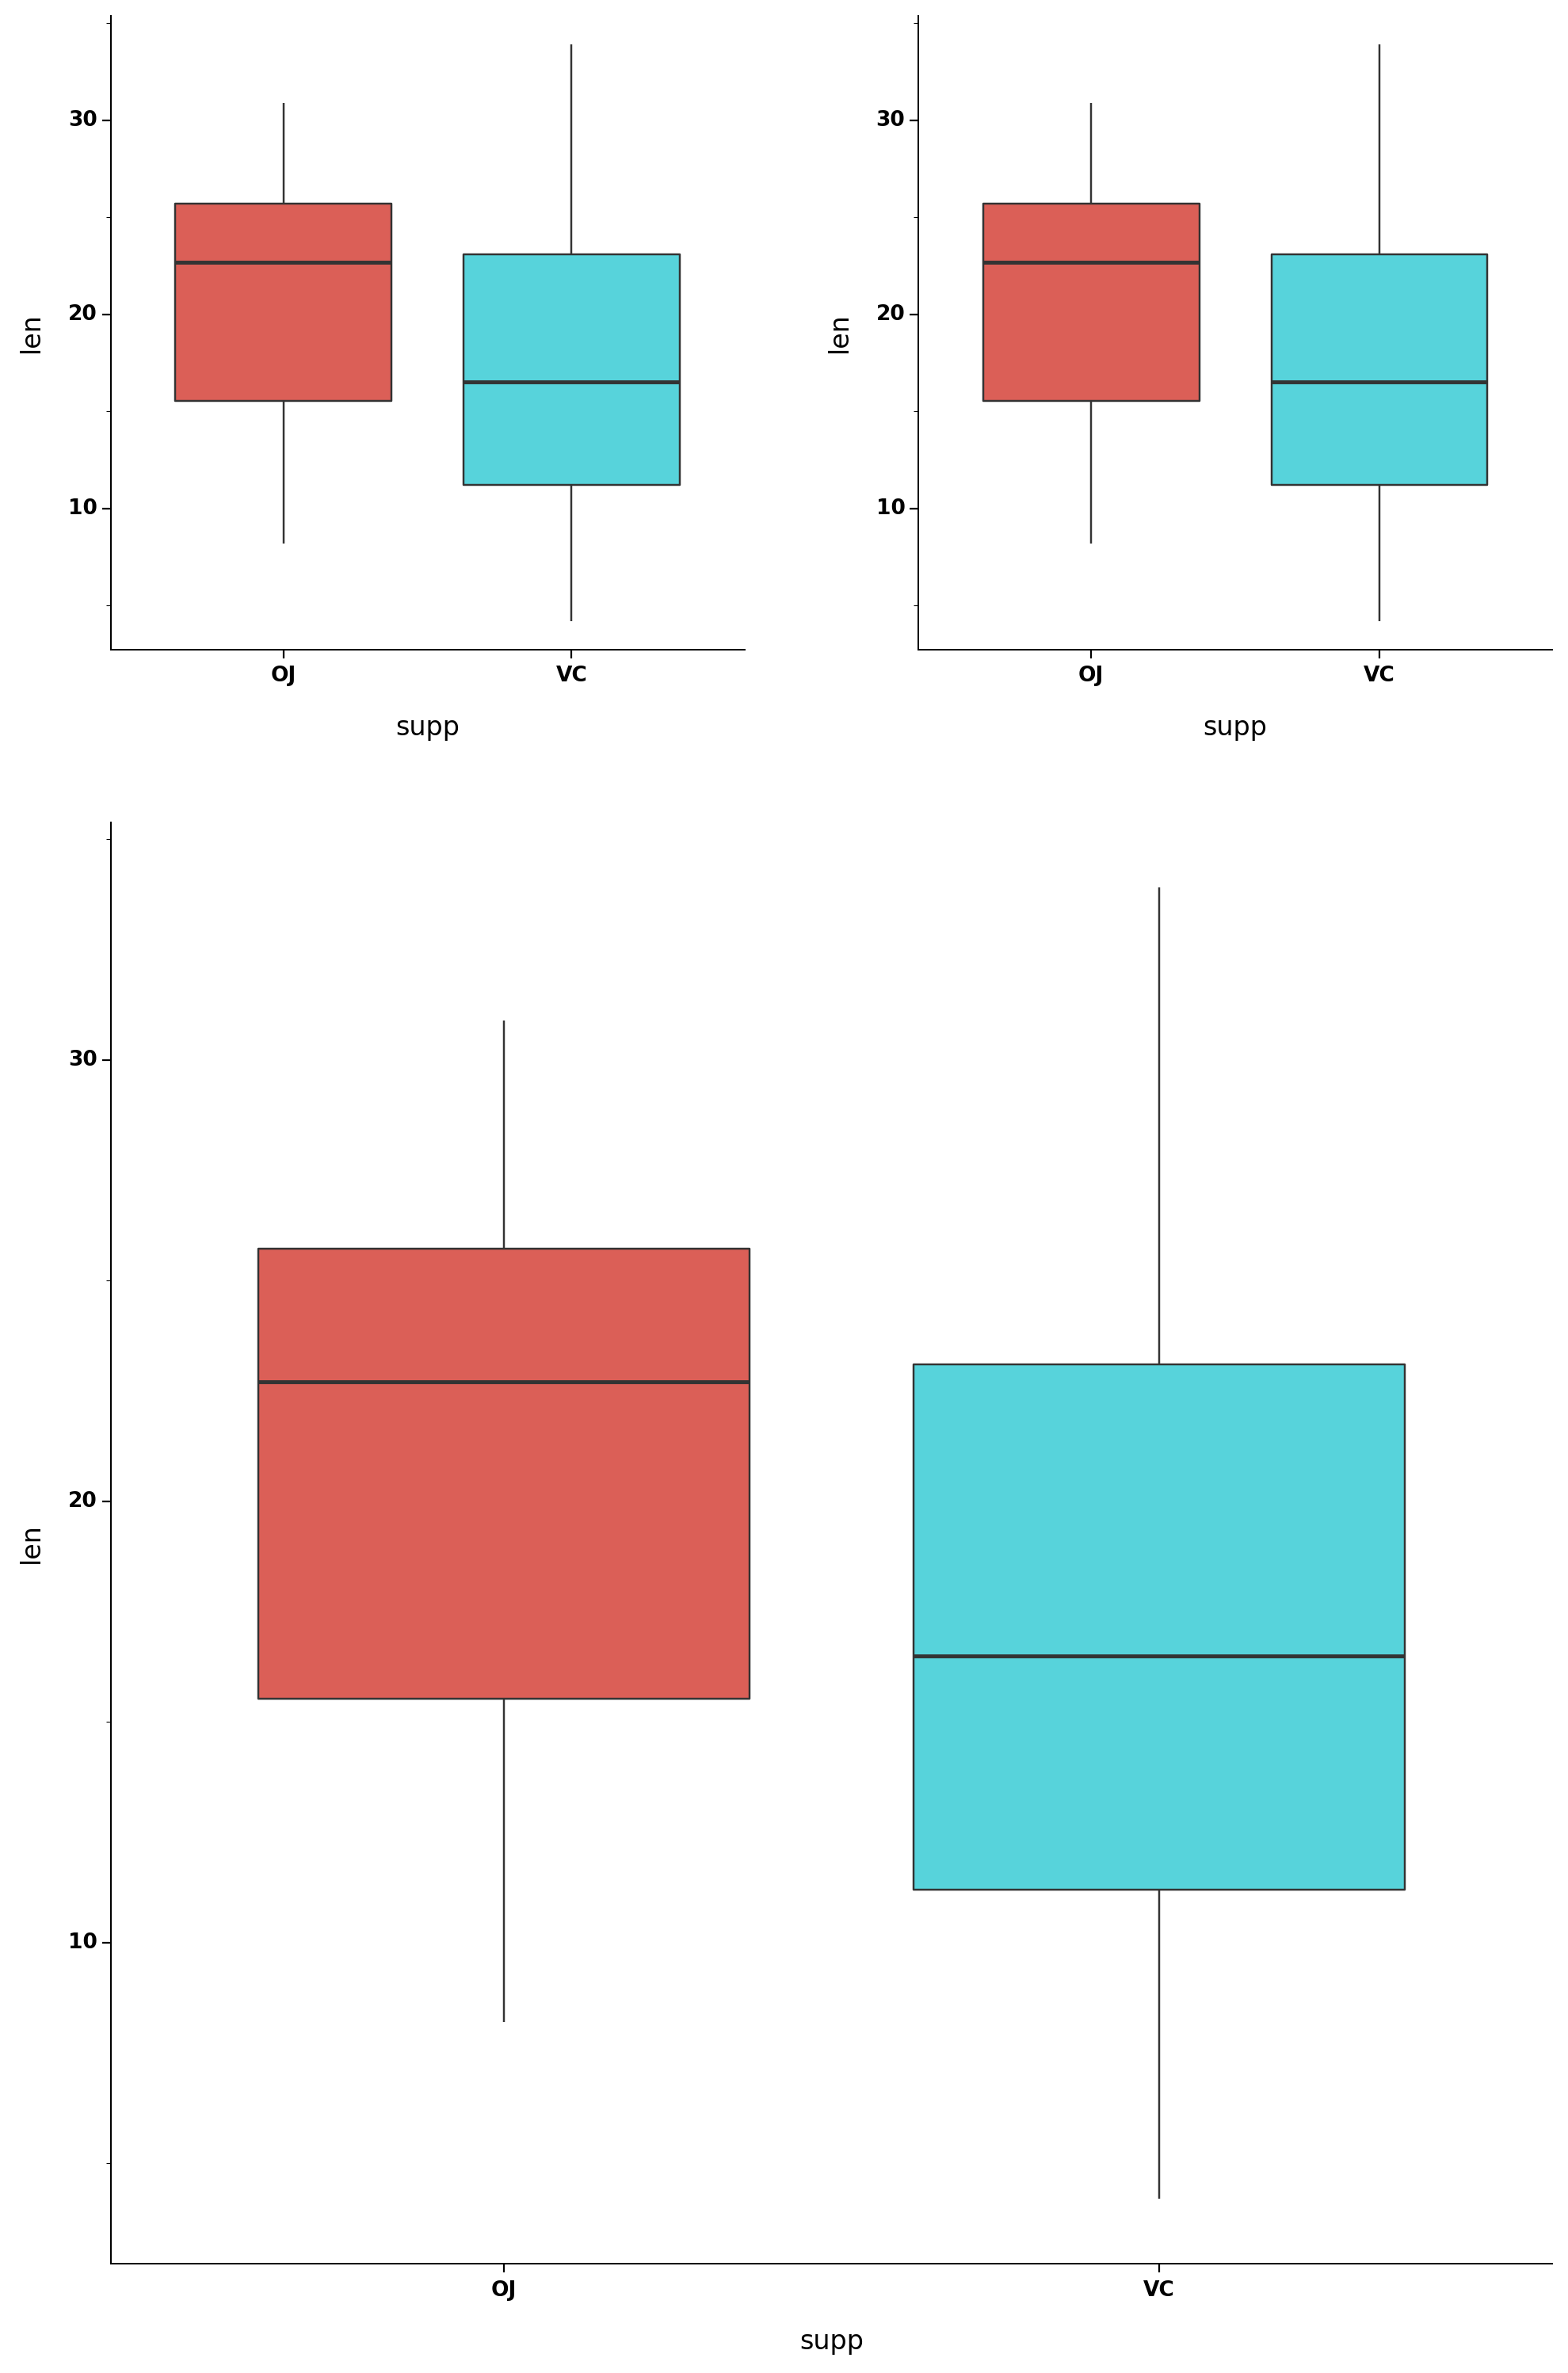

In [3]:

# Minor ticks are on by default in plotnine

p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
    + theme(legend_position="none")
)

# to turn it off
p1 = p + scale_y_continuous(guide=guide_prism())
# to turn it on again
p2 = p + scale_y_continuous(guide=guide_prism_minor())
# or
p3 = p + guides(y = "prism_minor")

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b3 = pw.load_ggplot(p3)
(b1 | b2) / (b3)

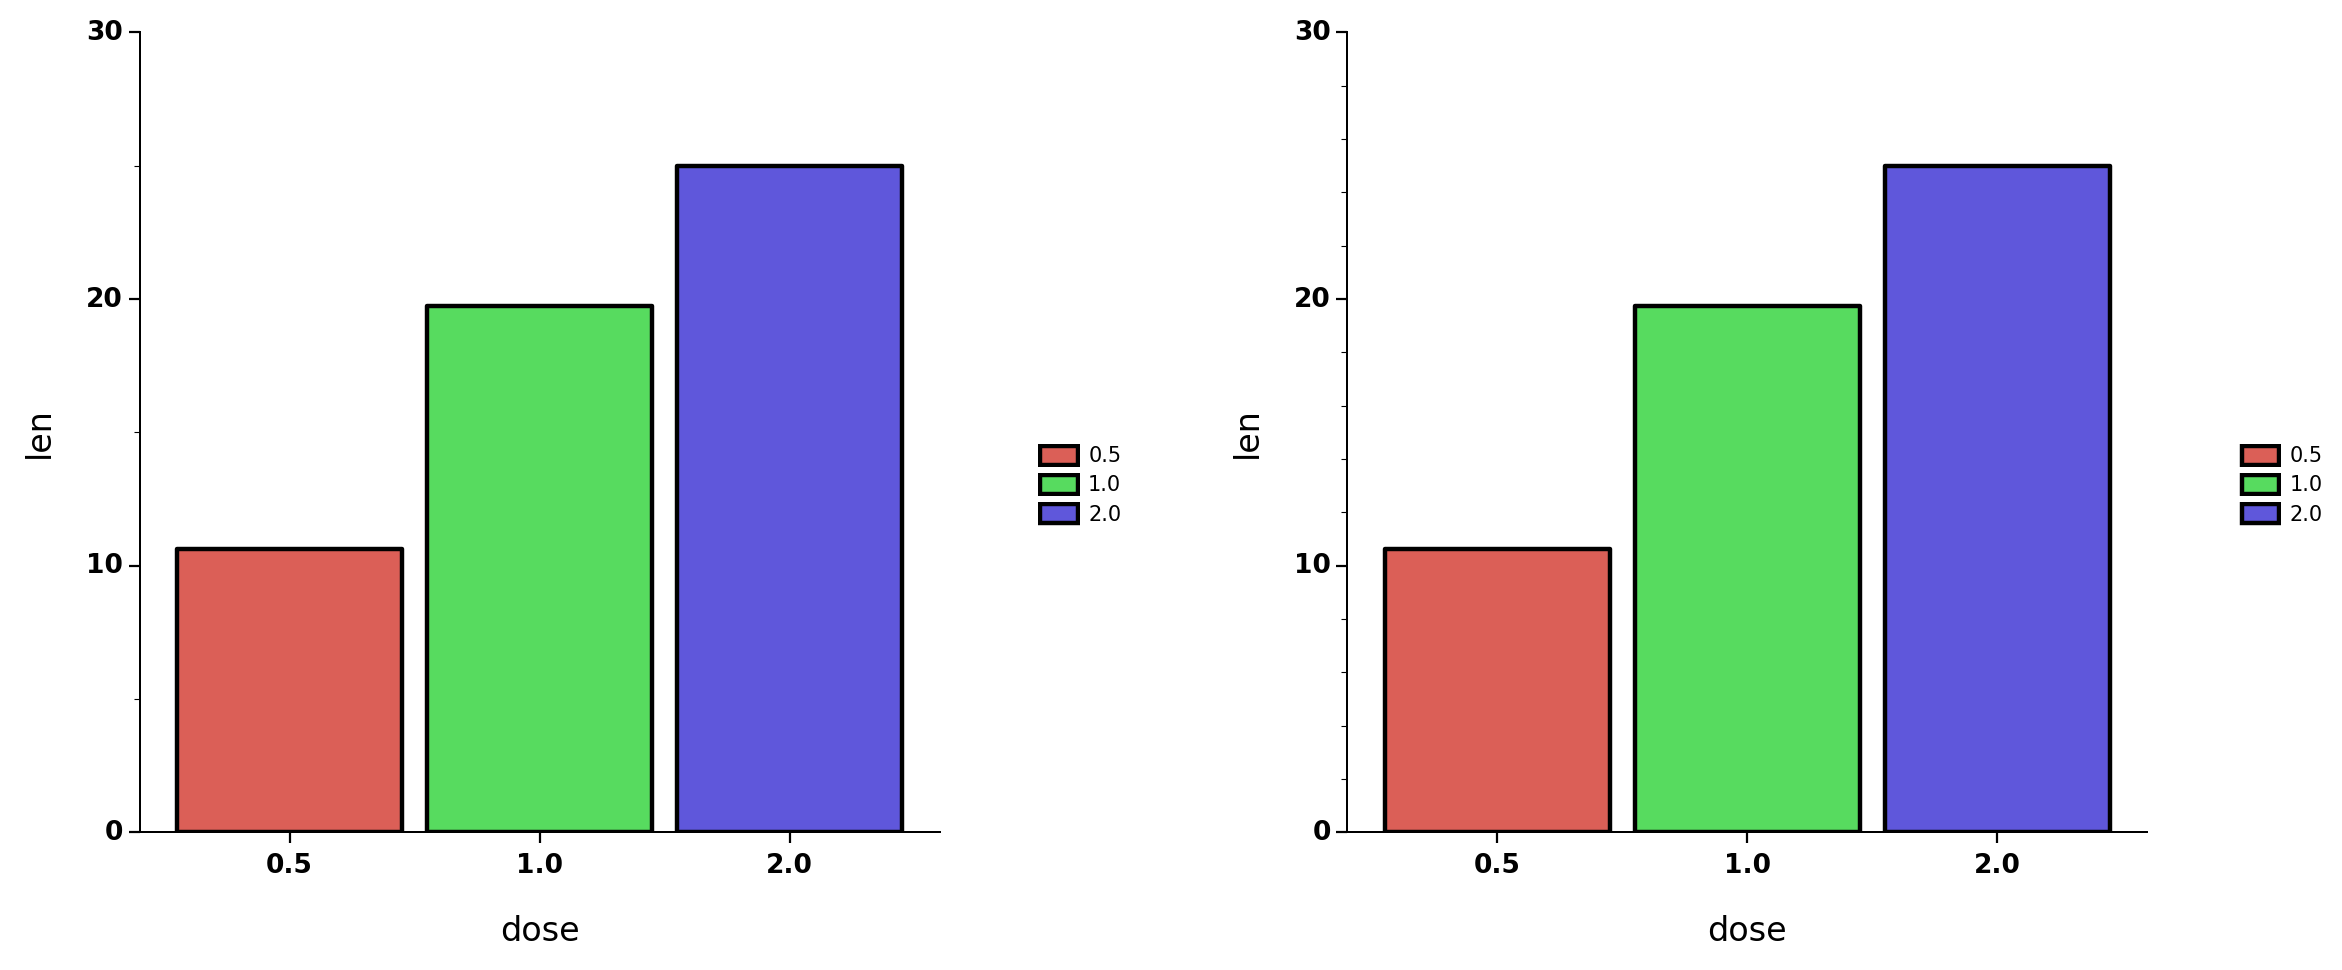

In [4]:
# compare 1 minor ticks (default) vs 4 minor ticks per major tick
p = (
    ggplot(ToothGrowth, aes(x="dose", y="len"))
    + stat_summary(
        aes(fill="dose"),
        na_rm=True,
        geom="col",
        fun_y=numpy.mean,
        colour="black",
        size=0.9,
    )
    + theme_prism()
)

p1 = p + scale_y_continuous(
    guide=guide_prism_minor(),
    limits=(0, 30),
    expand=(0, 0),
)
p2 = p + scale_y_continuous(
    guide=guide_prism_minor(),
    limits=(0, 30),
    expand=(0, 0),
    minor_breaks=seq(0, 30, 2),
)

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

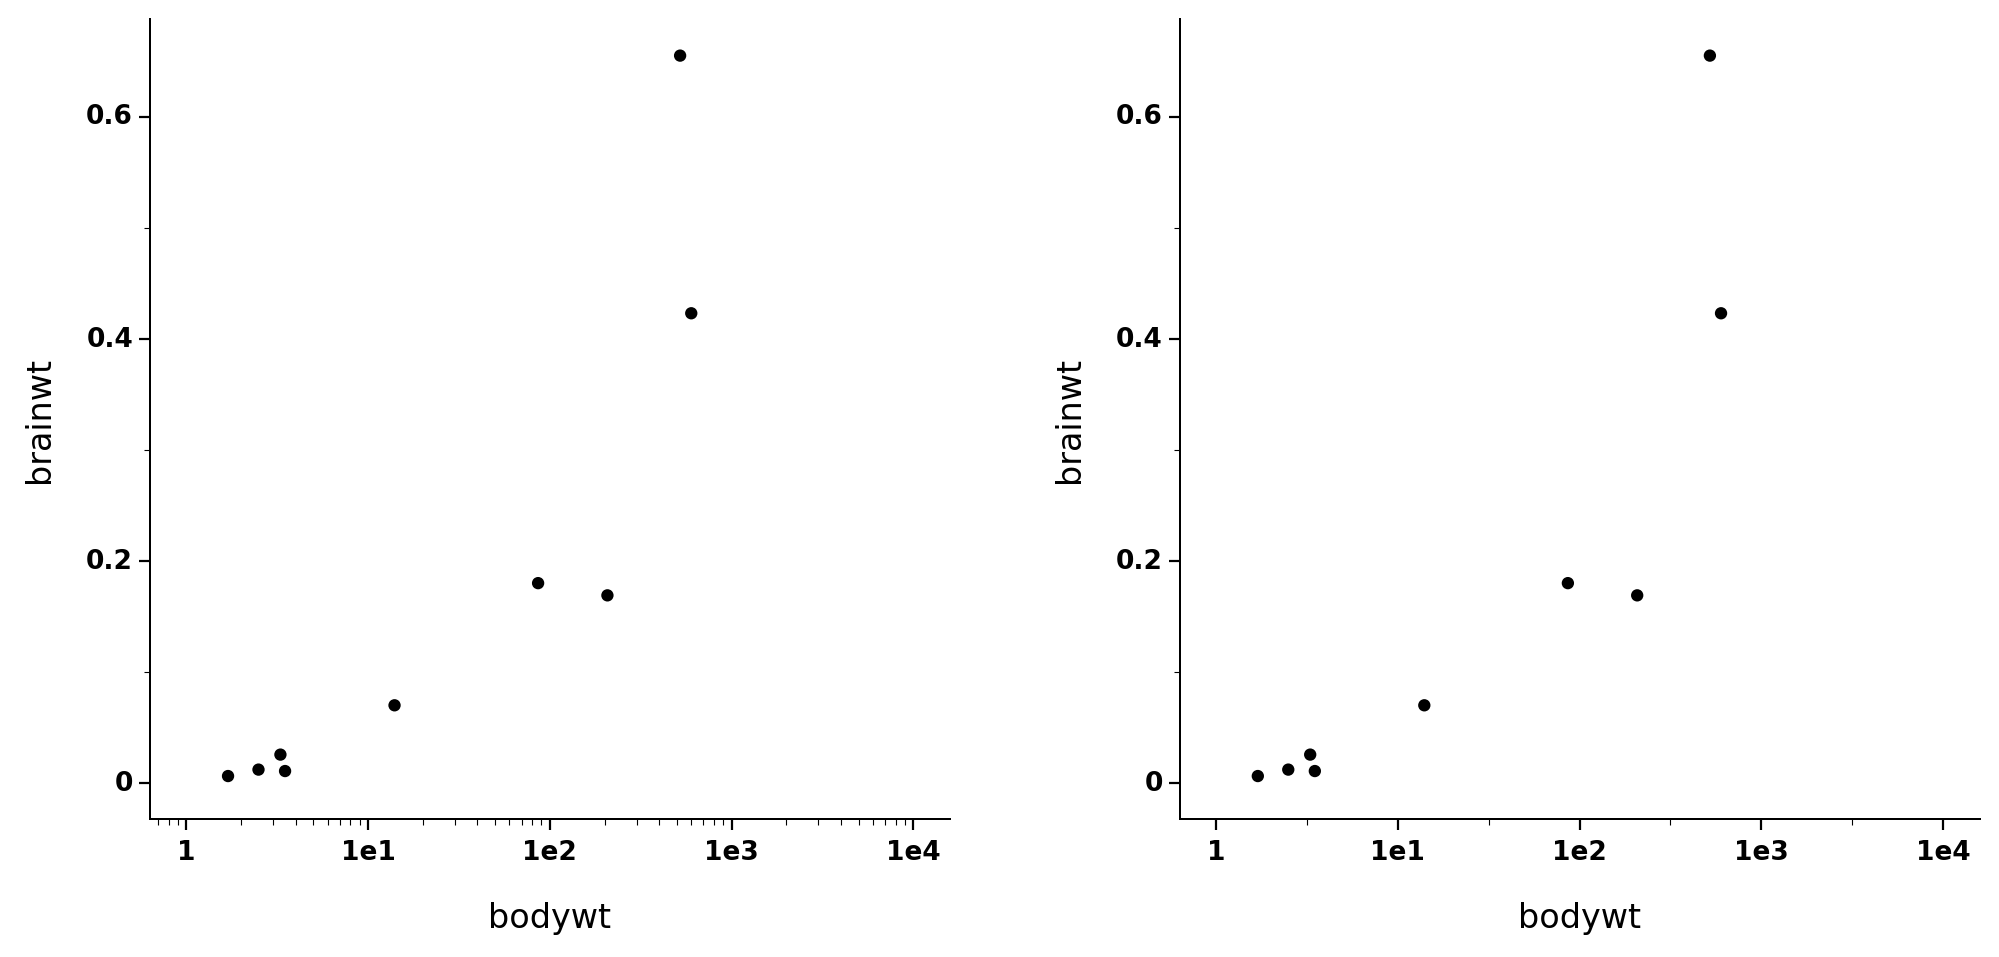

In [5]:
# log10 minor ticks

p = (
    ggplot(msleep, aes("bodywt", "brainwt"))
    + geom_point(na_rm=True)
    + theme_prism()
)

# log10 minor ticks added automatically
p1 = p + scale_x_log10(
    limits=(1e0, 1e4),
    guide=guide_prism_minor(),
)
# get back to normal minor ticks
p2 = p + scale_x_log10(
    limits=(1e0, 1e4),
    minor_breaks=[10**.5, 10**1.5, 10**2.5, 10**3.5],
    guide=guide_prism_minor(),
)

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

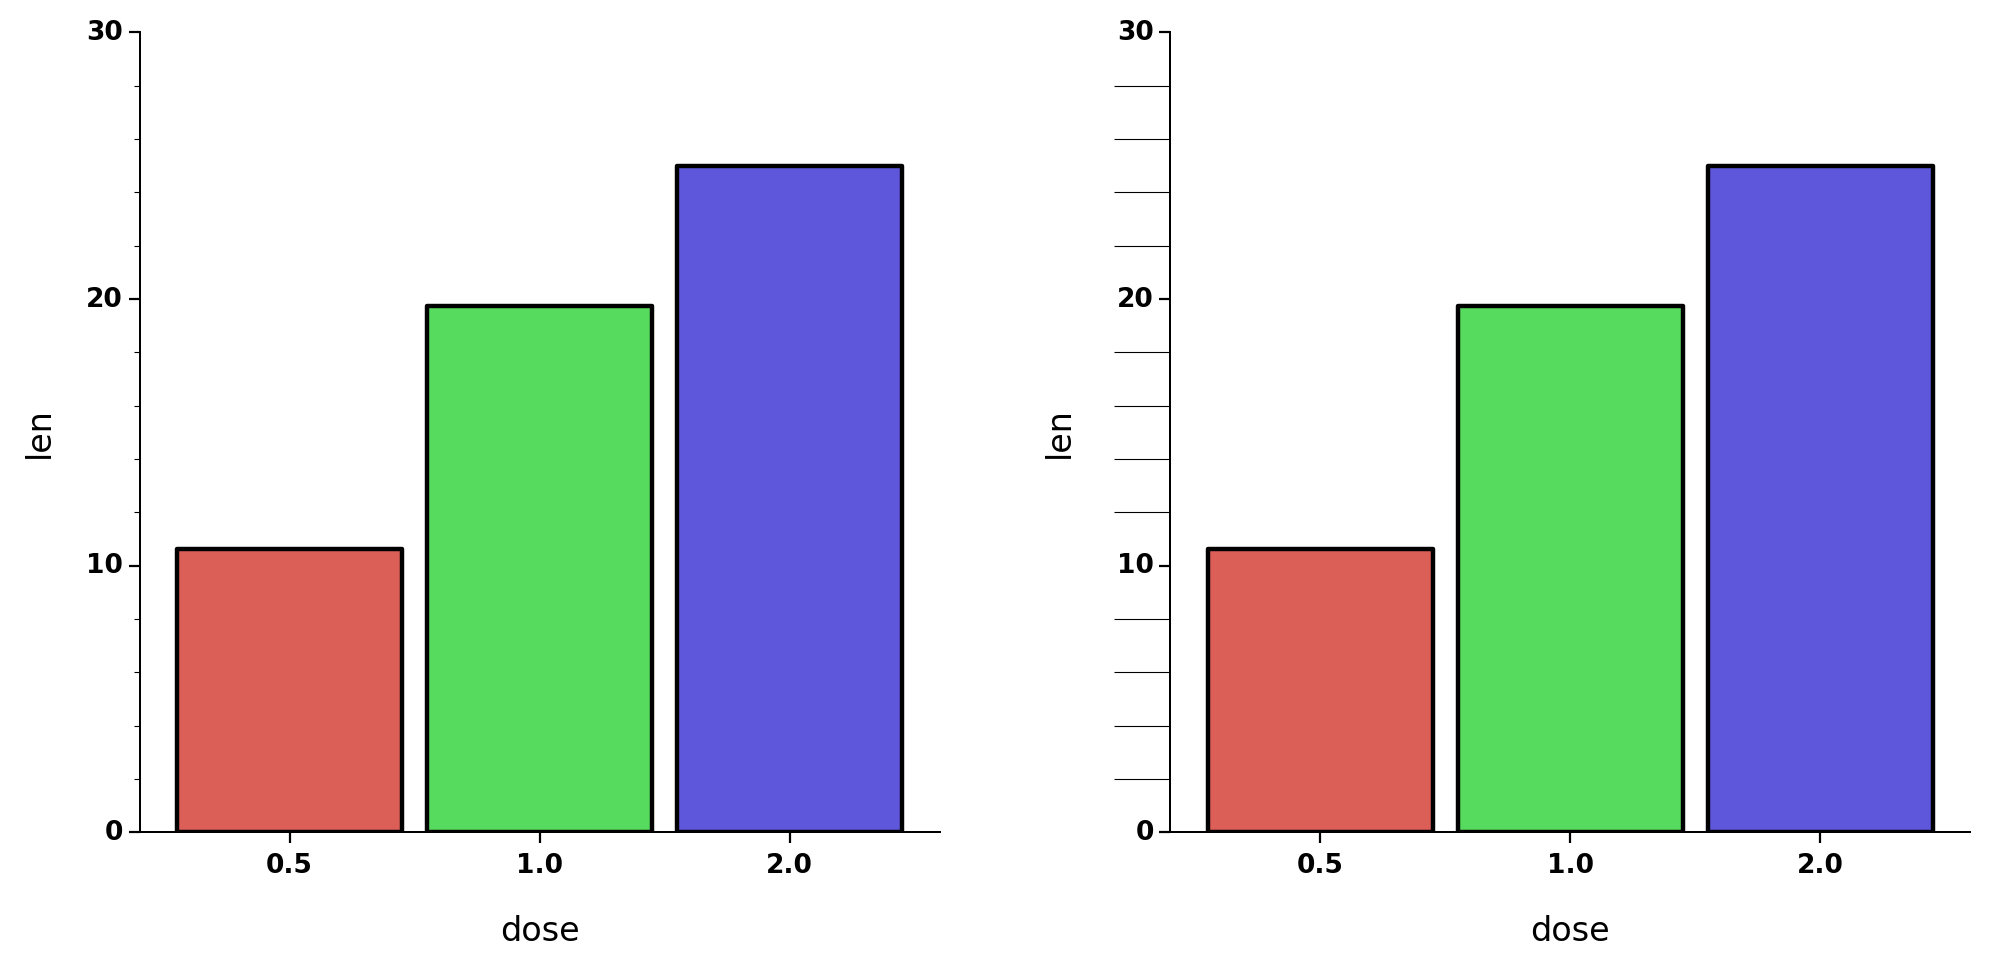

In [6]:
# change minor tick length
p = (
    ggplot(ToothGrowth, aes(x="dose", y="len"))
    + stat_summary(
        aes(fill="dose"),
        na_rm=True,
        geom="col",
        fun_y=numpy.mean,
        colour="black",
        size=0.9,
    )
    + theme_prism()
    + scale_y_continuous(
        guide=guide_prism_minor(),
        limits=(0, 30),
        expand=(0, 0),
        minor_breaks=seq(0, 30, 2),
    )
)

p1 = p + theme(legend_position="none")
p2 = p + theme(legend_position="none", prism_ticks_length_y=20)

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

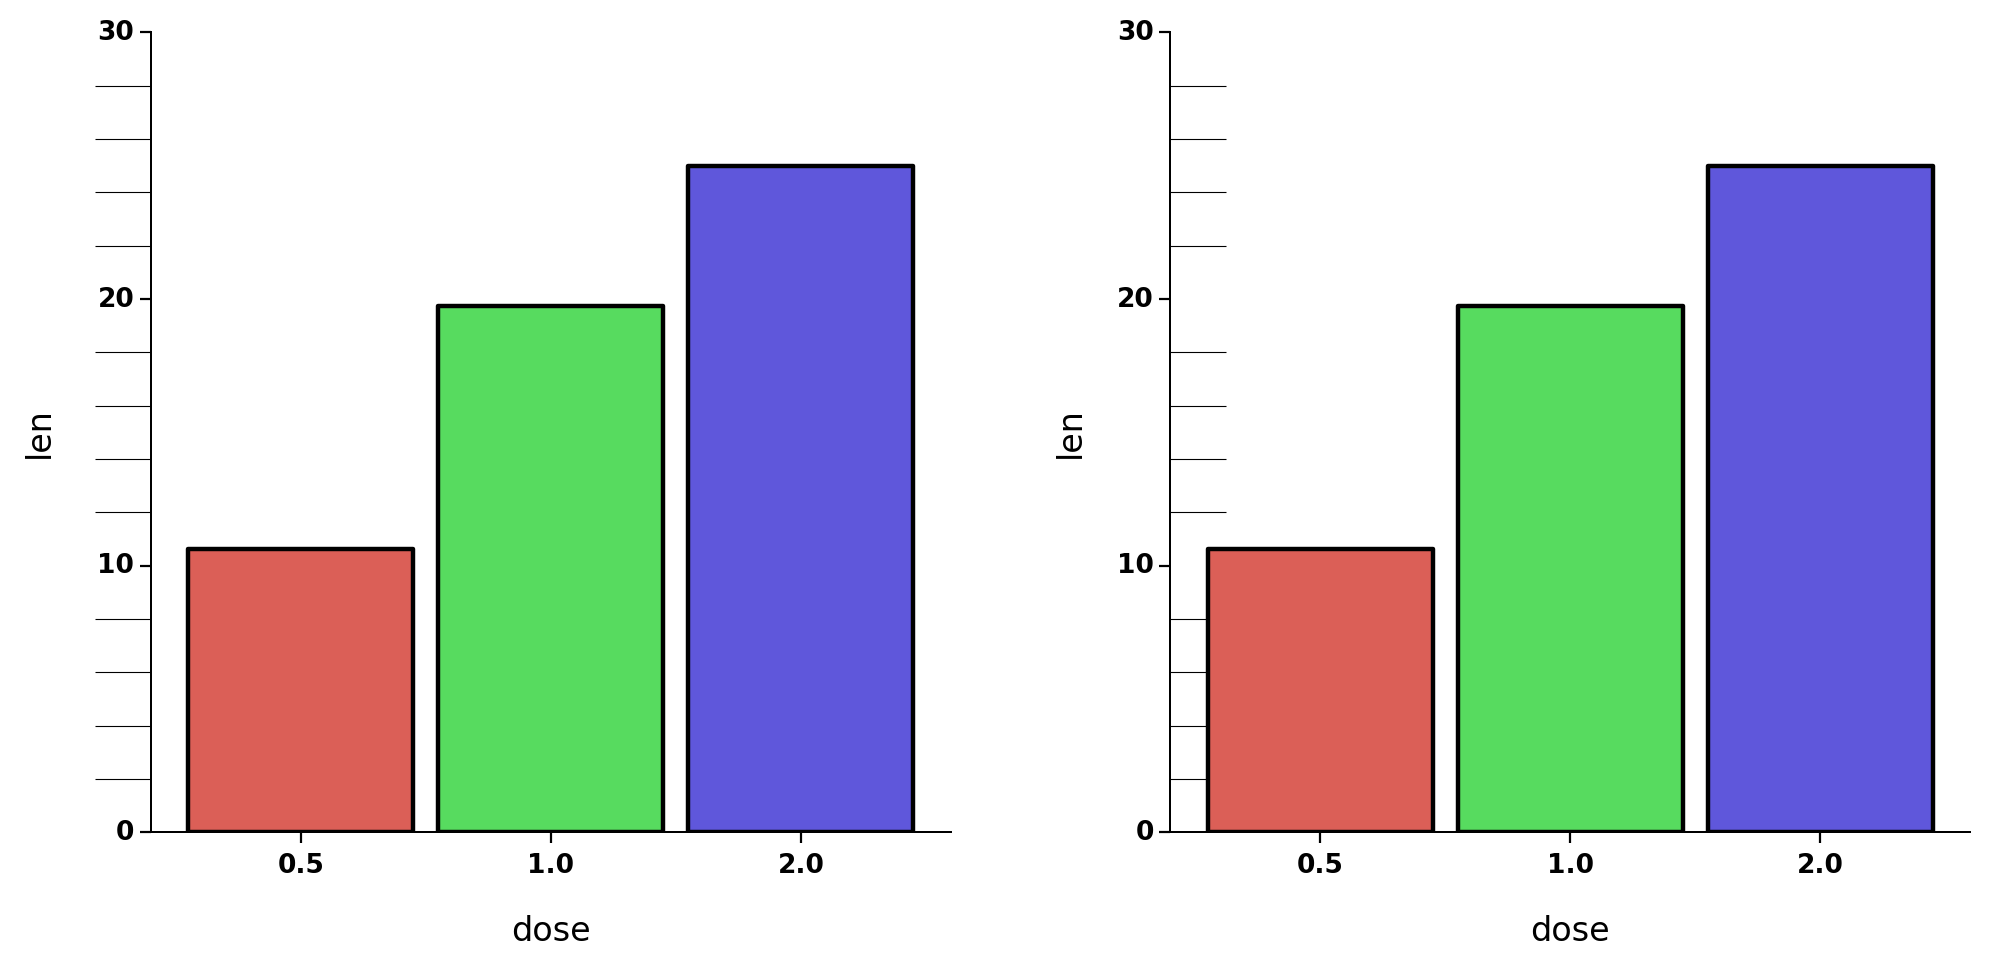

In [7]:
# change minor tick length
p1 = p + theme(legend_position="none", prism_ticks_length_y=20)
p2 = p + theme(legend_position="none", prism_ticks_length_y=-20)

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2

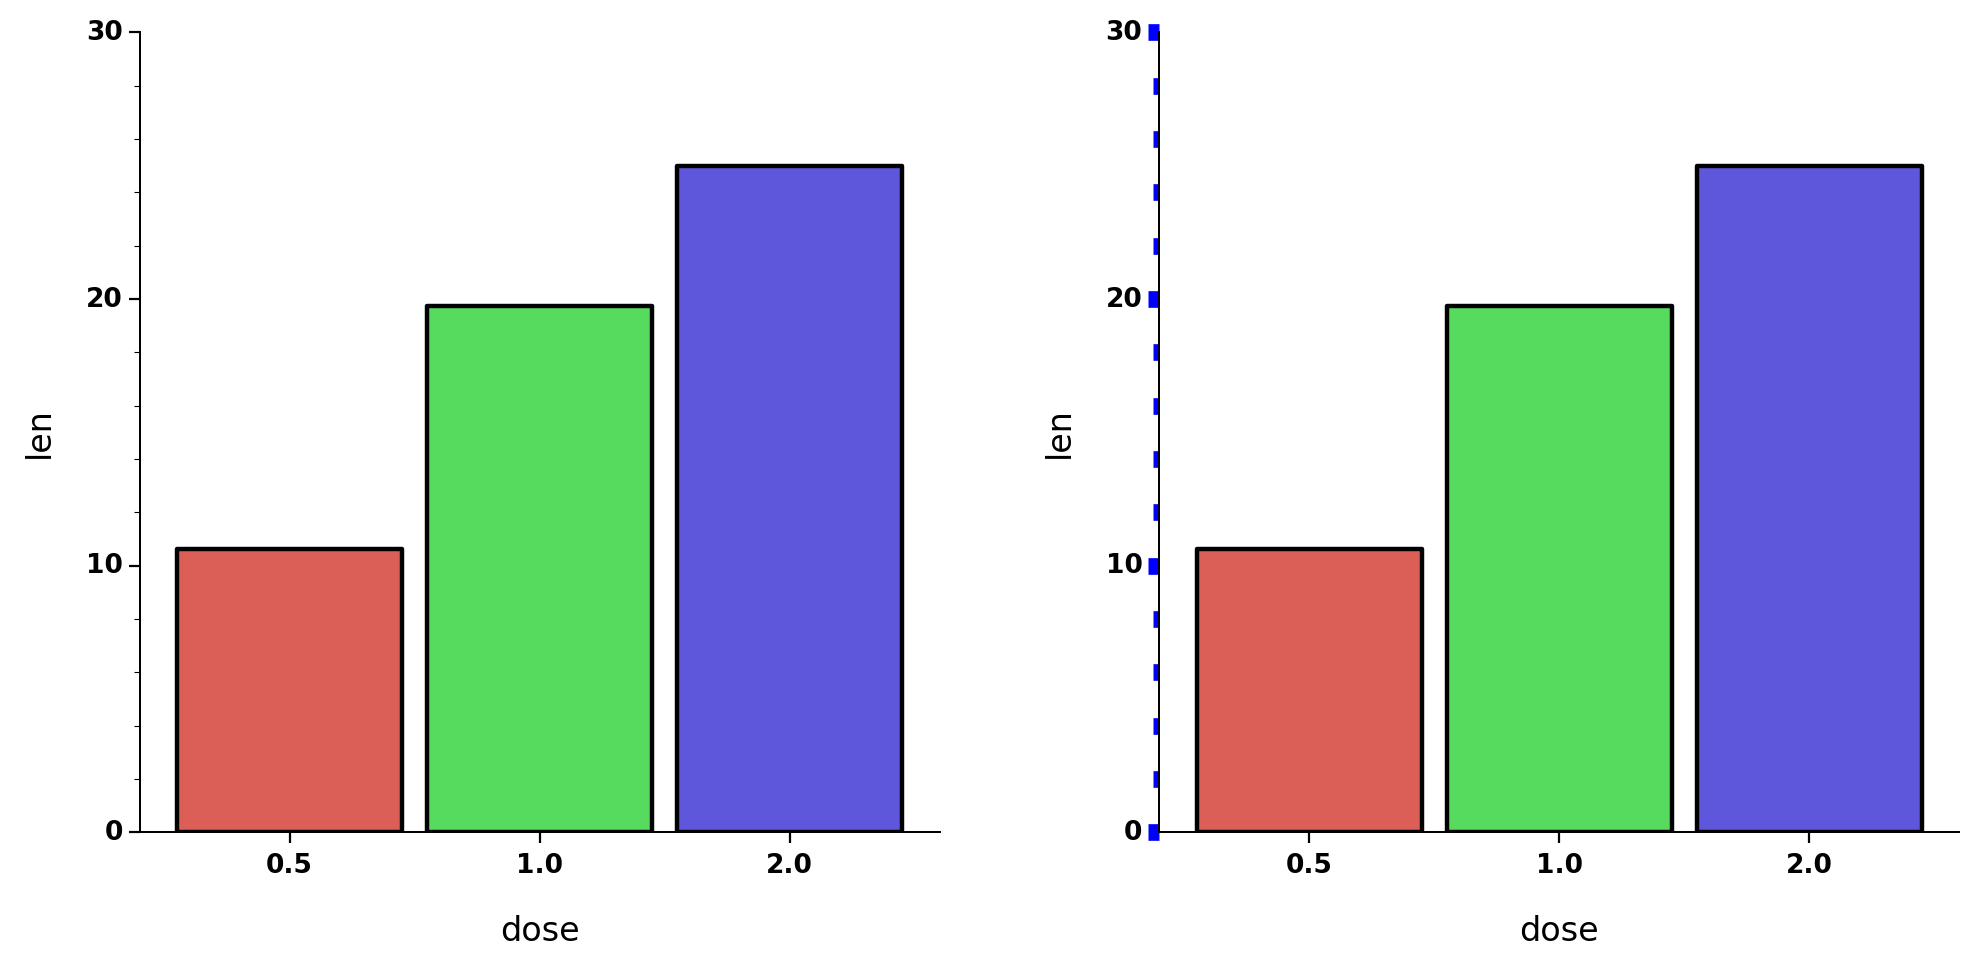

In [8]:
# change how ticks look

p1 = p + theme(legend_position="none")
p2 = p + theme(
    legend_position="none",
    axis_ticks_y=element_line(size=6, color="blue"),
)

b1 = pw.load_ggplot(p1)
b2 = pw.load_ggplot(p2)
b1 | b2


# Offset axis

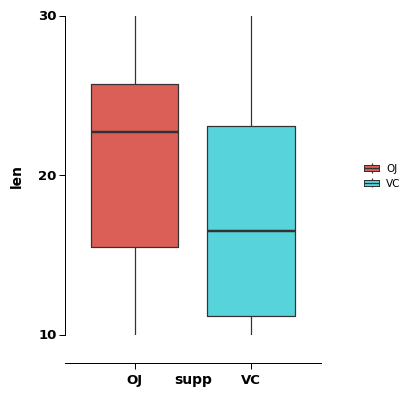

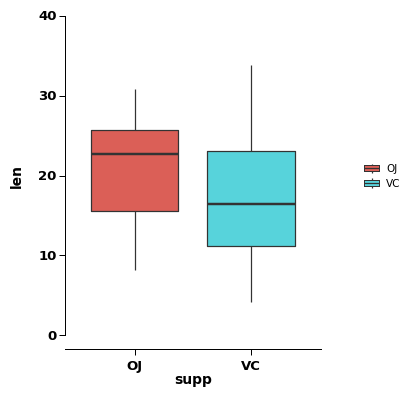

In [9]:
# show that offset axis looks better when you specify the axis limits
p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
    # guides not working without legend in plotnine
    # + theme(legend_position="none")
)


p1 = p + scale_y_continuous(guide=guide_prism_offset())
p2 = p + scale_y_continuous(limits=(0, 40), guide=guide_prism_offset())

print(p1, p2)

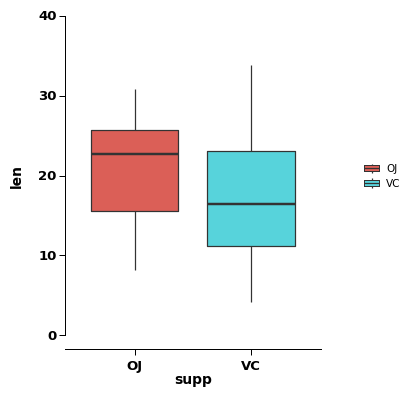

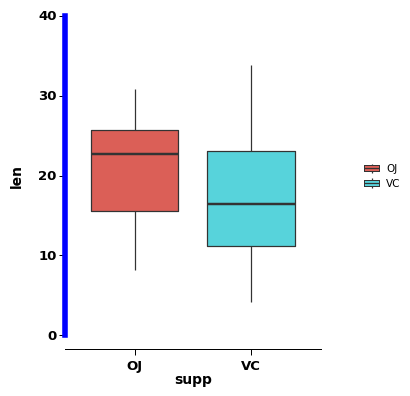

In [10]:
# change appearance of offset axis
p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
    + scale_y_continuous(limits=(0, 40), guide=guide_prism_offset())
)

p1 = p
p2 = p + theme(axis_line_y=element_line(colour="blue", size=4))

print(p1, p2)

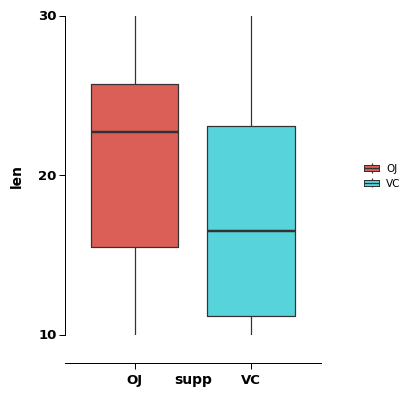

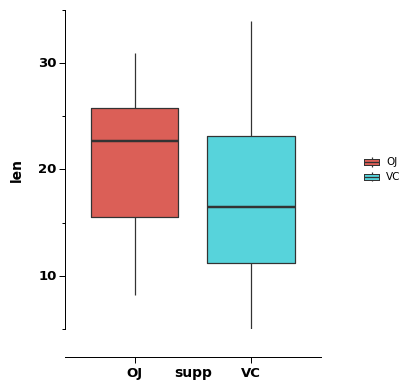

In [11]:
# compare prism_minor with prism_offset_minor
p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
)

p1 = p + scale_y_continuous(guide=guide_prism_offset())
p2 = p + scale_y_continuous(guide=guide_prism_offset_minor())

print(p1, p2)

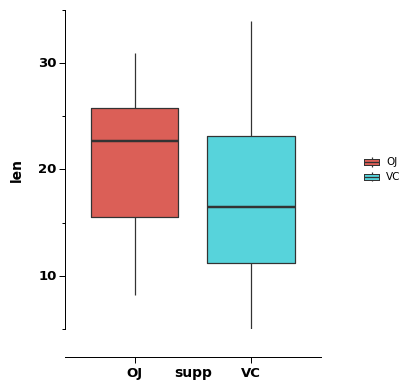

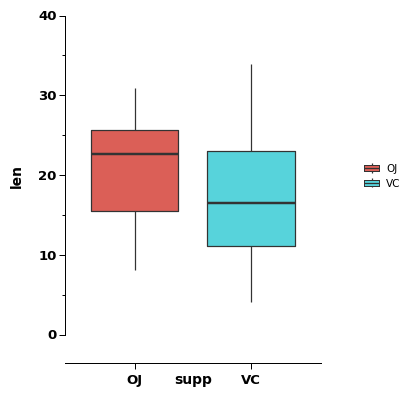

In [12]:
# As with guide_prism_offset(), the axis tends to look better
# if you explicitly set the axis limits.
p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
)

p1 = p + scale_y_continuous(guide=guide_prism_offset_minor())
p2 = p + scale_y_continuous(limits=(0, 40), guide=guide_prism_offset_minor())

print(p1, p2)

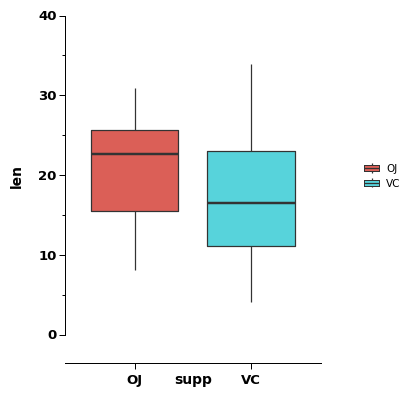

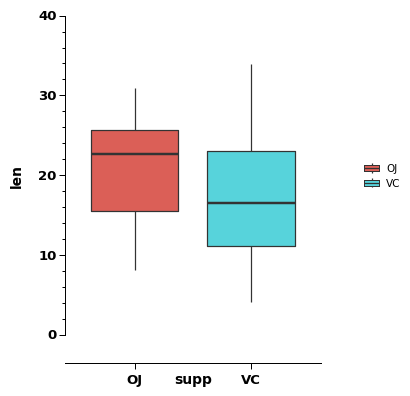

In [13]:
# compare 1 minor tick to 4 minor ticks per major
p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
)

p1 = p + scale_y_continuous(
    limits=(0, 40),
    guide=guide_prism_offset_minor(),
)
p2 = p + scale_y_continuous(
    limits=(0, 40),
    minor_breaks=seq(0, 40, 2),
    guide=guide_prism_offset_minor(),
)

print(p1, p2)

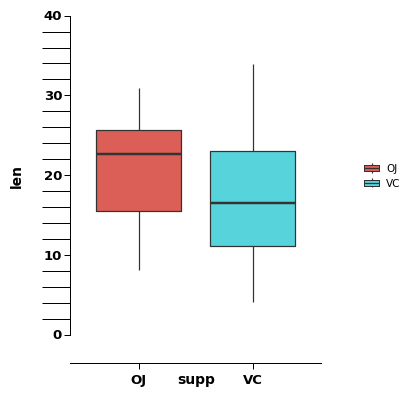

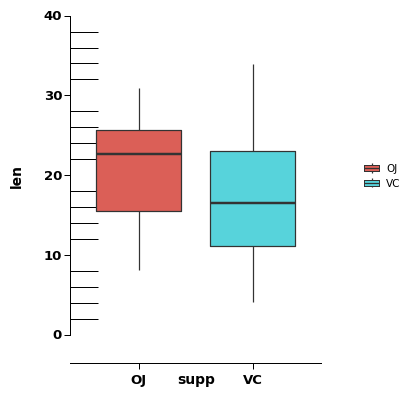

In [14]:
# change minor tick length and direction
p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
    + scale_y_continuous(
        limits=(0, 40),
        minor_breaks=seq(0, 40, 2),
        guide=guide_prism_offset_minor(),
    )
)

p1 = p + theme(prism_ticks_length_y=20)
p2 = p + theme(prism_ticks_length_y=-20)

print(p1, p2)


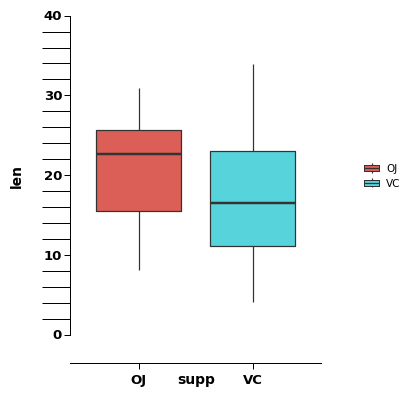

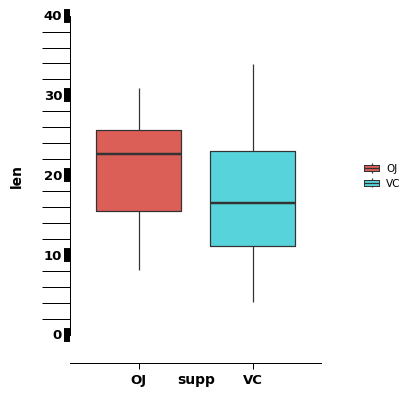

In [15]:
# change minor tick length and direction
p = (
    ggplot(ToothGrowth, aes(x="supp", y="len"))
    + geom_boxplot(aes(fill="supp"))
    + theme_prism()
    + scale_y_continuous(
        limits=(0, 40),
        minor_breaks=seq(0, 40, 2),
        guide=guide_prism_offset_minor(),
    )
)

p1 = p + theme(prism_ticks_length_y=20)
p2 = p + theme(
    prism_ticks_length_y=20,
    axis_ticks_y=element_line(size=10),
)

print(p1, p2)


# Border with minor ticks

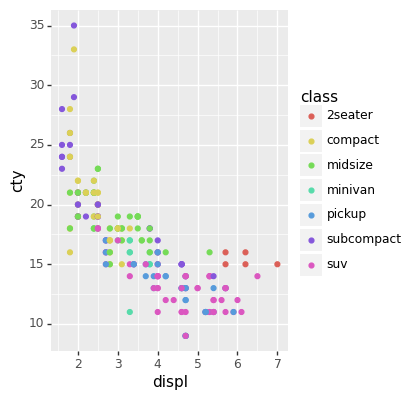

<Figure Size: (400 x 400)>

In [16]:
# define a base plot
from datar.data import mpg
base = ggplot(mpg, aes(x="displ", y="cty")) + geom_point(aes(colour="class"))

base

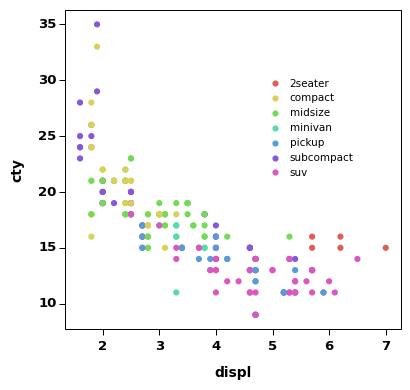

<Figure Size: (400 x 400)>

In [17]:
# apply theme_prism and turn clipping off for the border
p = (
    base
    + theme_prism(border=True)
    + theme(legend_position=(0.75, 0.65))
    + coord_cartesian()
    + scale_x_continuous(guide=guide_prism())
    + scale_y_continuous(guide=guide_prism())
)
p

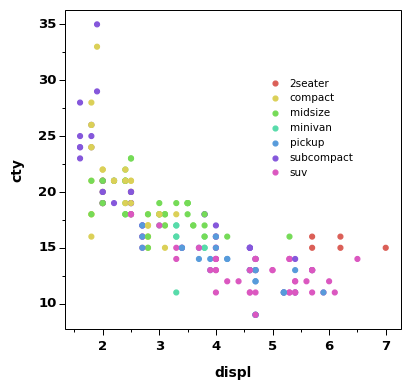

<Figure Size: (400 x 400)>

In [18]:
# get minor ticks back
p = (
    base
    + theme_prism(border=True)
    + theme(legend_position=(0.75, 0.65))
    + coord_cartesian()
    + scale_x_continuous(guide=guide_prism_minor())
    + scale_y_continuous(guide=guide_prism_minor())
)
p